# Naive Bayes Classifier

## Import the libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal


In [42]:
# Fix a seed for reproducability
np.random.seed(0)

## Generate Data

In [43]:
# Number of sample
n_samples = 200

In [44]:
# Generate data for class-0

mean0 = [2, 2]  # Mean of class 0
cov0 = [[1,0], [0, 1]]

class0_data = np.random.multivariate_normal(mean0, cov0, n_samples)

In [45]:
class0_data.shape

(200, 2)

In [46]:
# Generate data for class-1

mean1 = [-2, -2]  # Mean of class 0
cov1 = [[1,0], [0, 1]]

class1_data = np.random.multivariate_normal(mean1, cov1, n_samples)

In [47]:
class1_data.shape

(200, 2)

In [48]:
# Concatenate data

X = np.concatenate((class0_data, class1_data), axis=0)
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)), axis=0)

In [49]:
X.shape

(400, 2)

In [50]:
y.shape

(400,)

In [51]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Plot the Data

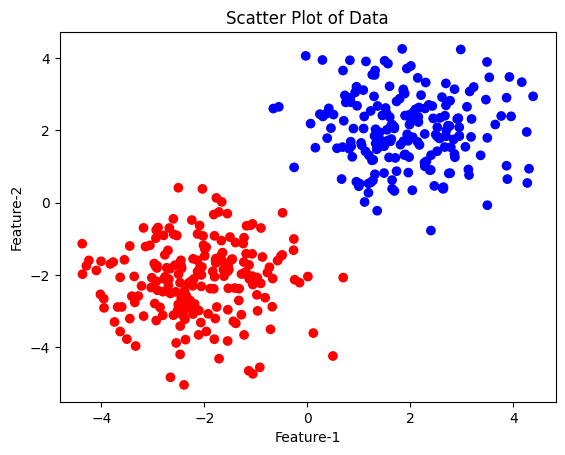

In [52]:
# Scatter plot of data

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.title('Scatter Plot of Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

# Implement the Naive Bayes Classifier

### Compute Prior class probability:

P(0): Prior for class 0

P(1): Prior for class 1

### Compute the parameters of the Likelihood function
>> conditional probability





# Custom function to implement Bayesian Classification

In [54]:
# Compute the class means
class0_mean = np.mean(X[y==0], axis=0)
class1_mean = np.mean(X[y==1], axis=0)

# Compute covariance
class0_cov = np.cov(X[y==0], rowvar=False)
class1_cov = np.cov(X[y==1], rowvar=False)

# Compute the class Priors
class0_prob = np.sum(y==0) / len(y)
class1_prob =  np.sum(y==1) / len(y)

def bayesian_classifier(X):

  # Compute the likelihood of class 0 and class 1
  likelihood0 = multivariate_normal.pdf(X, class0_mean, class0_cov)
  likelihood1 = multivariate_normal.pdf(X, class1_mean, class1_cov)

  # Compute the Posterior probability
  posterior0 = likelihood0 * class0_prob
  posterior1 = likelihood1 * class1_prob

  # Return the classification result

  if posterior0 > posterior1:
    return 0
  else:
    return 1


## Create a Meshgrid with points plot the data and decision boundary

In [ ]:
# Create the Meshgrid

h = 0.02 # step size of the grid

x_min, x_max = X[:, 0].min() -1 , X[:,0].max()+1
y_min, y_max = X[:, 1].min() -1 , X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [58]:
x_min

-5.369586905226603

# Make Prediction with the Classifier

In [56]:
# # Predict

Z = np.array([bayesian_classifier(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot Data and Decision Boundary

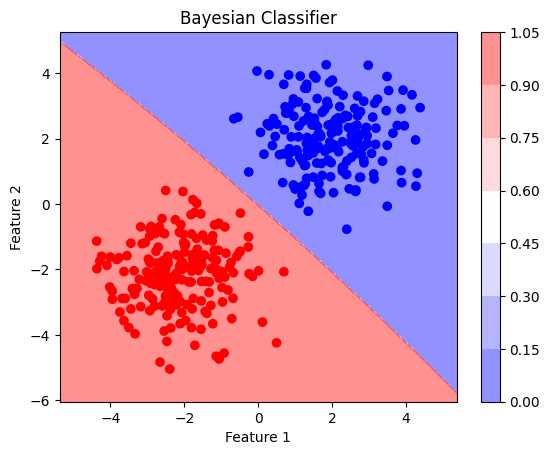

In [57]:
# Plot the probabilities and the boundary of the Bayesian classifier
plt.contourf(xx, yy, Z, alpha=0.5, cmap='bwr')
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Bayesian Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
